In [1]:
import scanpy as sc
import pandas as pd 
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm.notebook import tqdm
import warnings
import itertools as it
import pickle as pkl
import os
from copy import copy
import warnings
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import seaborn as sns

import json
import requests
# from IPython.display import display, HTML
# import bbknn
import time

In [2]:
sc.settings.verbosity = 4
sc.settings.set_figure_params(dpi=80)

In [3]:
prefix = '/data/xyzeq/'

### Load in the data

In [4]:
adata_xyz = sc.read_h5ad(prefix + '/most.recent/xyz.mouse.decontam.colors.cts.h5ad')

### Visualize

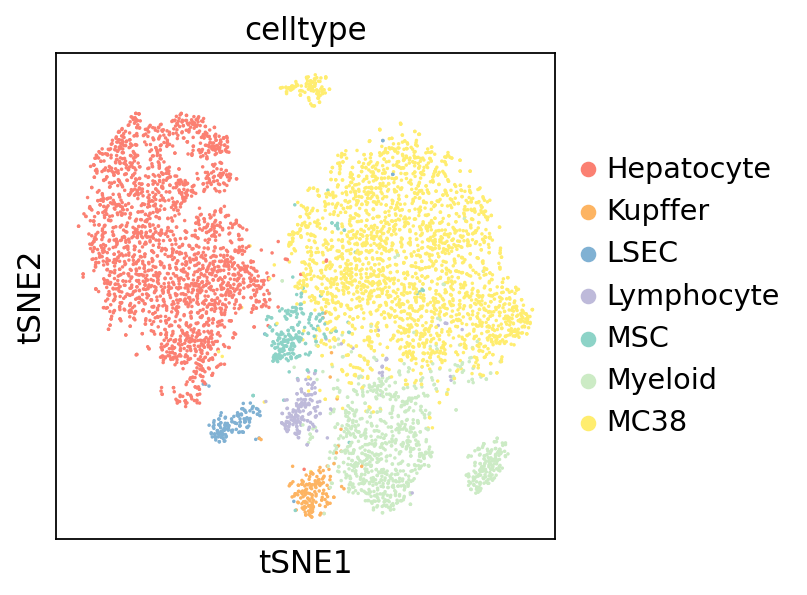

In [6]:
sc.pl.tsne(adata_xyz,color=['celltype'], size=10)

## Figure 3F and S4B

In [7]:
counts = dict()

In [8]:
adata_xyz

AnnData object with n_obs × n_vars = 6623 × 764
    obs: 'batch', 'n_counts', 'log_counts', 'n_genes', 'barcode', 'percent_mito_mouse', 'percent_mito_human', 'mouse_counts', 'human_counts', 'ratio', 'cell_call', 'contam_init', 'tsne_density', 'leiden', 'celltype', '__is_in_cluster__'
    var: 'mean', 'std'
    uns: 'CellType_colors', 'batch_colors', 'celltype_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'rank_genes_groups_filtered', 'tsne_density_params', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [9]:
for bc in tqdm(adata_xyz.obs['barcode'].unique()):
    df = adata_xyz.obs[adata_xyz.obs['barcode'] == bc]
    v, c = np.unique(df['celltype'].values, return_counts=True)
    counts[bc] = dict(zip(v,c))

In [10]:
adata_xyz.obs['celltype'].value_counts()

MC38          2649
Hepatocyte    2302
Myeloid        969
MSC            231
Lymphocyte     176
Kupffer        163
LSEC           133
Name: celltype, dtype: int64

In [11]:
df = pd.DataFrame.from_dict(counts).fillna(0).T

In [13]:
df1 = df[['Hepatocyte', 'Kupffer', 'Myeloid', 'LSEC', 'Lymphocyte', 'MSC', 'MC38']]
df2 = df[['Hepatocyte', 'Myeloid', 'MC38']]

In [14]:
# color_dict = dict(zip(adata_xyz.obs['celltype'].dtype.categories, adata_xyz.uns['celltype_colors']))

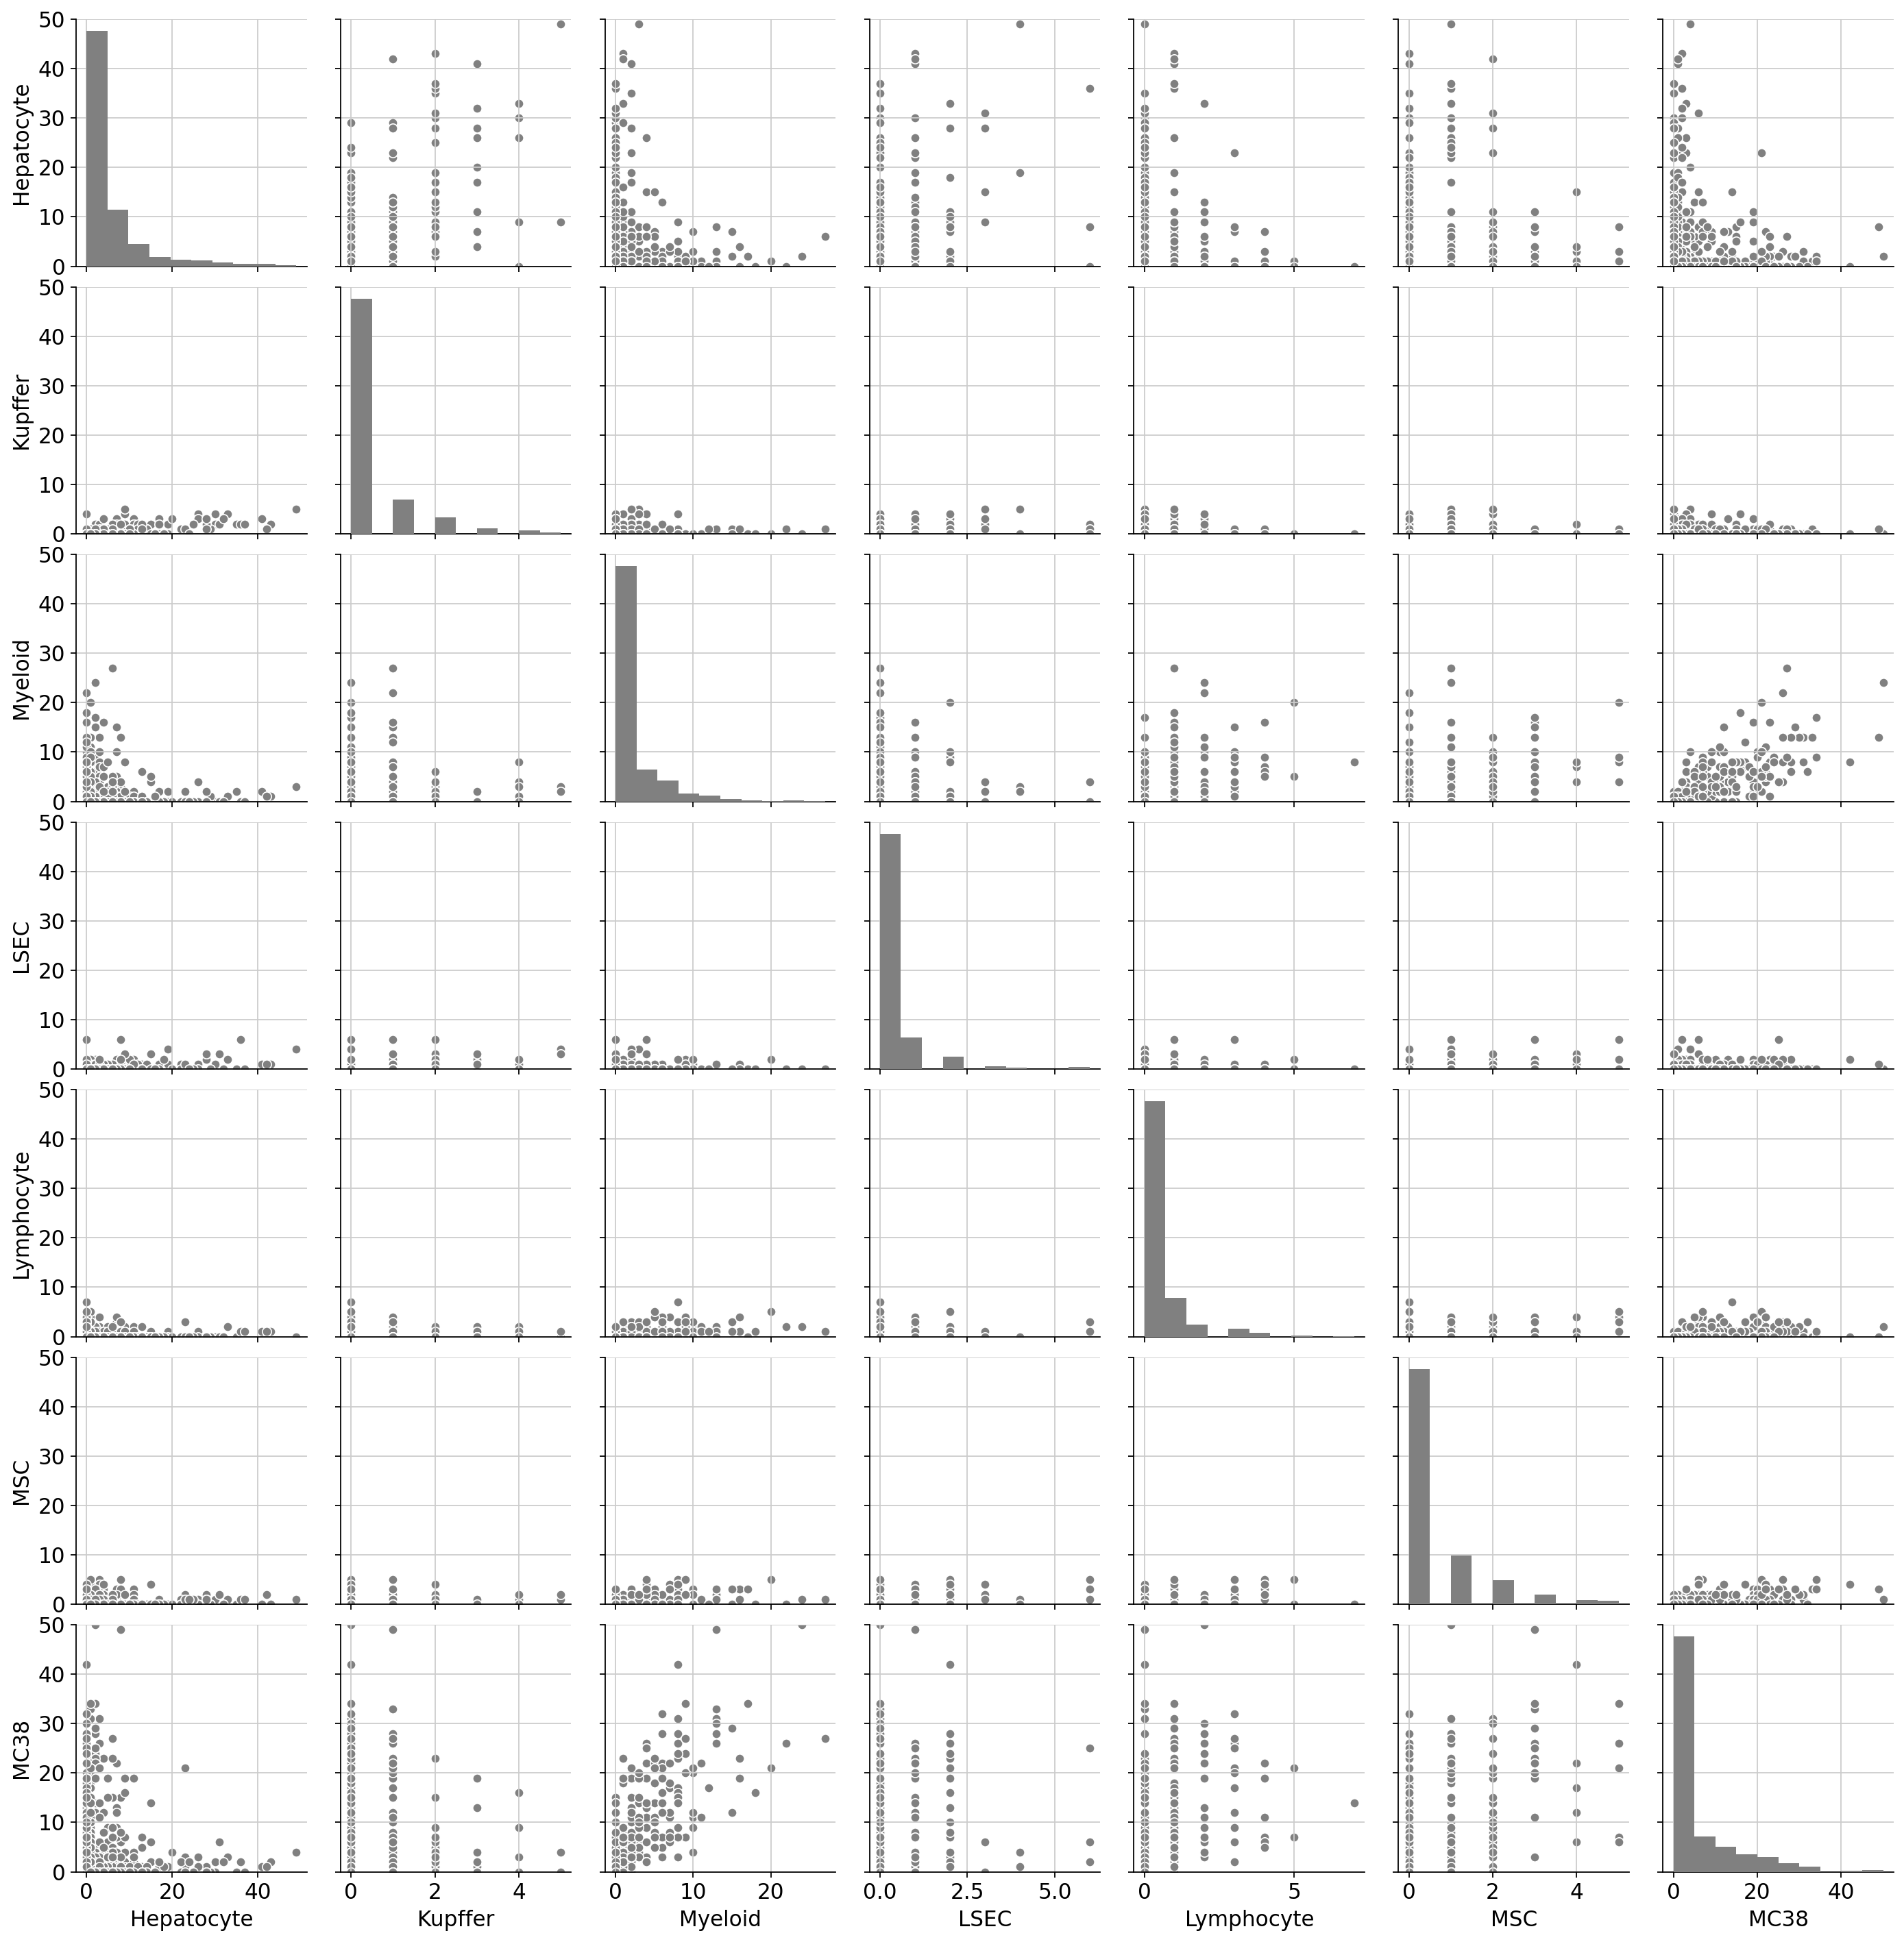

In [17]:
# due to the issue outlines here: https://github.com/mwaskom/seaborn/issues/1369
# we are adjusting the y limits manually
# sns.pairplot(df1);

g = sns.pairplot(df1, plot_kws={'color':'gray'}, diag_kws={'color':'gray'})
g.set(ylim=(df1.min().min(),df1.max().max()));
# plt.savefig('/data/xyzeq/figures/10X.down.XYZ.decontam/gh.for.youjin.12OCT20/S4B/pairplot.svg')

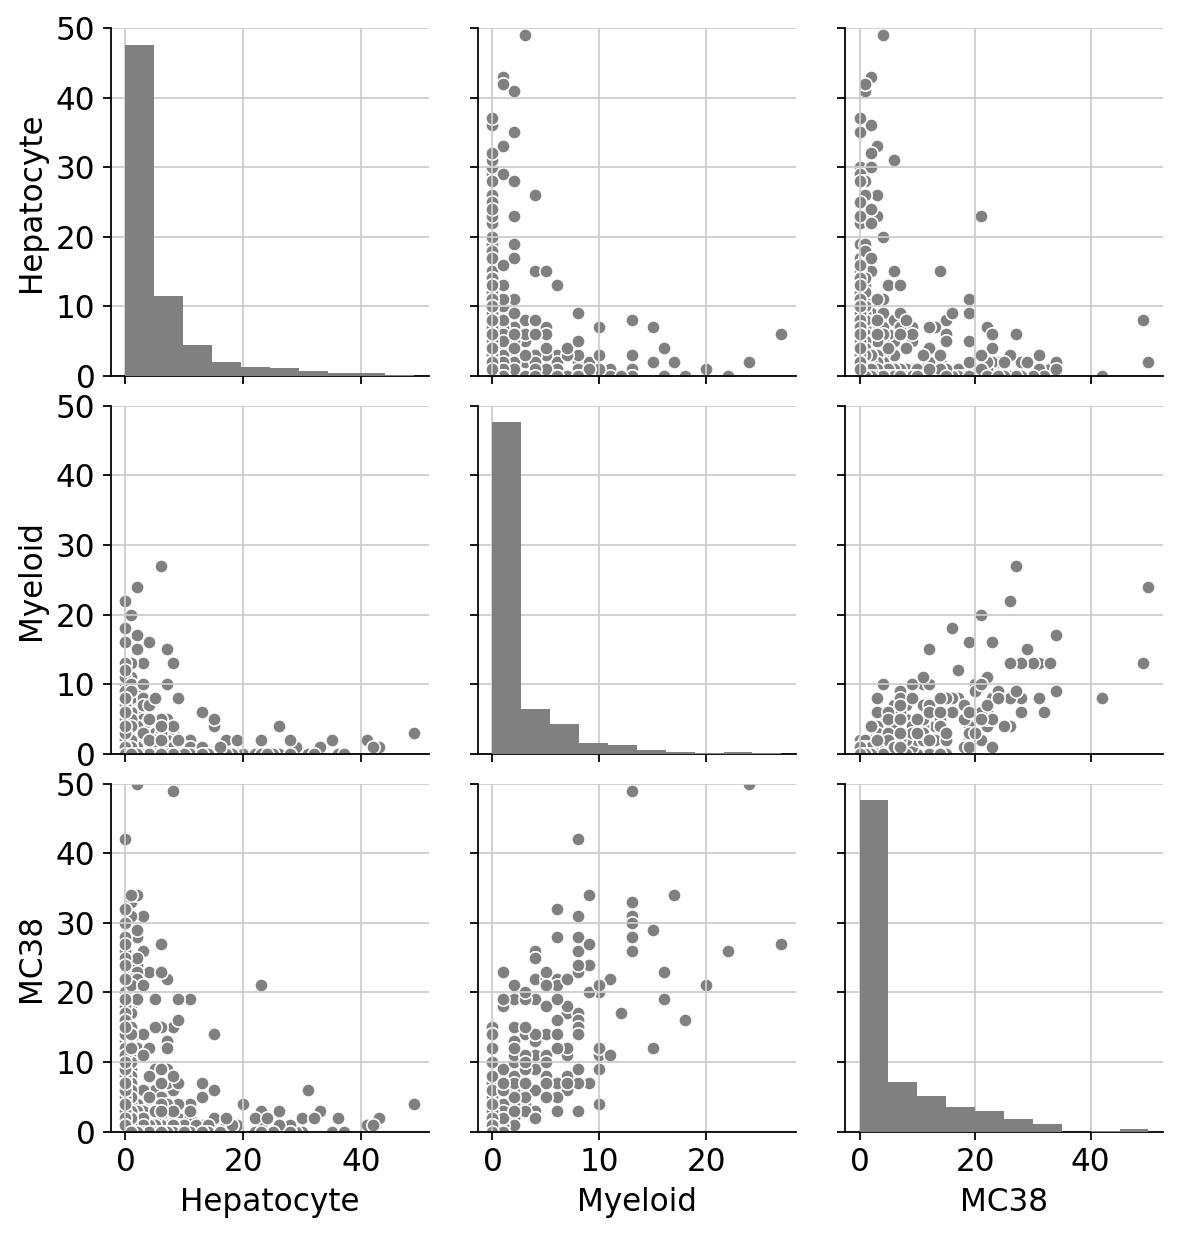

In [18]:
# due to the issue outlines here: https://github.com/mwaskom/seaborn/issues/1369
# we are adjusting the y limits manually
# sns.pairplot(df2);

g = sns.pairplot(df2, plot_kws={'color':'gray'}, diag_kws={'color':'gray'})
g.set(ylim=(df2.min().min(),df2.max().max()));
# plt.savefig('/data/xyzeq/figures/10X.down.XYZ.decontam/gh.for.youjin.12OCT20/3F/pairplot.myeloid.svg')